## Procedure:     Global sensitivity analysis for matrix-based LCA
### Method:        Squared standardized regression coefficients (SSRC) & MCS: Monte Carlo simulation (normal random)

Author:        Evelyne Groen {evelyne [dot] groen [at] gmail [dot] com}

Last update:   25/10/2016

In [1]:
import numpy as np 

A_det = np.matrix('10 0; -2 100') #A-matrix
B_det = np.matrix('1 10')         #B-matrix
f = np.matrix('1000; 0')          #Functional unit vector f

g_LCA = B_det * A_det.I * f 
print("The deterministic result is:", g_LCA[0,0])   

The deterministic result is: 120.0


### Step 1: Uncertainty propagation

Monte Carlo simulation using normal distribution functions for all input parameters

The mean values are equal to the initial values of A and B. 
The standard deviation equals 5% of the mean of A and B. 

In [2]:
N = 1000                        #Sample size
CV = 0.05                       #Coefficient of variation (CV = sigma/mu)

import random

A1 = [random.gauss(A_det[0,0], CV*A_det[0,0]) for i in range(N)]
A3 = [random.gauss(A_det[1,0], CV*A_det[1,0]) for i in range(N)]
A4 = [random.gauss(A_det[1,1], CV*A_det[1,1]) for i in range(N)]

B1 = [random.gauss(B_det[0,0], CV*B_det[0,0]) for i in range(N)]
B2 = [random.gauss(B_det[0,1], CV*B_det[0,1]) for i in range(N)]


As = [np.matrix([[A1[i], 0],[A3[i], A4[i]]]) for i in range(N)]
Bs = [np.matrix([[B1[i], B2[i]]]) for i in range(N)]

f  = np.matrix('1000; 0')

gs = [B * A.I * f for A, B in zip(As, Bs)]

g_list =[g[0,0] for g in gs]

import statistics as stats
var_g = stats.variance(g_list)
print("The output variance equals:", var_g)


The output variance equals: 67.837485971


### Step 2: Calculate the regression coefficients

In [4]:
#Reshape the data
g_list = np.reshape([g[0,0] for g in gs], (N,1))
As_list = np.reshape(As, (N,4))
Bs_list = np.reshape(Bs, (N,2))

Ps_list = np.concatenate((np.ones((N,1)), As_list[:,:1], As_list[:,2:], Bs_list), axis=1)

from numpy.linalg import inv
RC = np.dot( np.dot( inv( (np.dot(Ps_list.T, Ps_list)) ), Ps_list.T), g_list)
print("Regression coefficients:", RC)

Regression coefficients: [[ 121.53798612]
 [ -12.03457281]
 [  -9.82054289]
 [  -0.20142098]
 [  99.66708199]
 [   2.00013677]]


### Step 3: calculate the squared standardized regression coefficients

In [5]:
import statistics as stats

var_g = stats.variance(g_list[:,0])
var_x = [stats.variance(Ps_list[:,k]) for k in range(1,6)]

SSRC =  (var_x/var_g) * (RC[1:6,0]**2)
print("squared standardized regression coefficients:", SSRC)

squared standardized regression coefficients: [ 0.54750413  0.01396637  0.01485254  0.38274565  0.01420565]


### Visualize

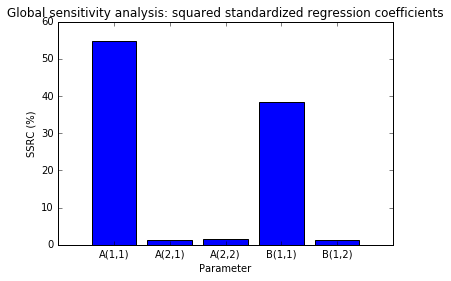

In [6]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

SSRC_procent = SSRC * 100

x_label=[ 'A(1,1)', 'A(2,1)', 'A(2,2)', 'B(1,1)', 'B(1,2)']
x_pos = range(5)
plt.bar(x_pos, SSRC_procent, align='center')
plt.xticks(x_pos, x_label)
plt.title('Global sensitivity analysis: squared standardized regression coefficients')
plt.ylabel('SSRC (%)')
plt.xlabel('Parameter')
plt.show()